## Inventory Management System

    Authors 
1. Ben Ochoro.
2. Joan Njoroge.
3. Jacqueline Tulinye.


## Overview
The Inventory Management System project aims to develop a comprehensive system for managing inventory levels, orders, and stock. By leveraging data analytics and machine learning models, the project seeks to optimize inventory levels, reduce carrying costs, and improve order fulfillment rates.



## Project Goal
The purpose of our project was driven by the need to harness the power of data analysis to decipher product trends and, in turn, construct a robust system for effective inventory management. In any retail setting, and particularly in a supermarket environment, understanding and adapting to product trends is a pivotal aspect of staying ahead in the market. 

Our first priority was to carefully examine the historical sales data for each product to find trends, recognize seasonality, and ascertain customer preferences.

Using the insights  from our data analysis, our  next step of action was to construct a predictive model capable of forecasting future sales. The core objective was to leverage this forecasting capability to proactively manage our stock levels, ensuring that we never run out of products.



## Business Understanding
The project addresses the challenge of managing inventory in a dynamic sales environment. Overstocking leads to increased holding costs, while understocking results in missed sales opportunities and dissatisfied customers. The system will provide actionable insights to balance inventory levels with demand patterns.



## Data Understanding
The dataset includes historical inventory data, sales records, and supplier lead times. It captures the quantity of items sold, dates of transactions, stock levels, and reorder points. This data is crucial for understanding patterns in inventory movement and forecasting future demand.



## Data Preparation
The data preparation phase involved cleaning the data, handling missing values, normalizing data formats, and creating new features that can be used in predictive models. Outliers were identified and treated to ensure they do not skew the model's performance.


In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

c:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the transaction data
df = pd.read_csv('Data/transaction.csv' , delimiter=';')
df.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
225,TR40245,355,16/01/2022,P6,18000,3,54000,12
1917,TR83001,105,17/05/2022,P9,10000,3,30000,1
630,TR41300,57,15/02/2022,P9,10000,7,70000,3
1398,TR45940,160,09/04/2022,P3,7500,1,7500,13
1372,TR13708,39,07/04/2022,P10,15000,2,30000,12


In [3]:
# Load the store data
df1 = pd.read_csv('Data/Store.csv' , delimiter = ';')
df1.sample(5)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
12,13,Buana,Buana,General Trade,"-1,26916","116,825264"
11,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


In [4]:
# Load the product data
df2 = pd.read_csv('Data/Product.csv' , delimiter = ';')
df2.sample(5)

,ProductID,Product Name,Price
9,P10,Cheese Stick,15000
2,P3,Crackers,7500
8,P9,Yoghurt,10000
4,P5,Thai Tea,4200
1,P2,Ginger Candy,3200


In [5]:
# Combining the three datasets to create one dataset
"""joining the 3 data sets to create one data set 
with only te features that we are going to need for our modelling"""

from pandasql import sqldf

query = """SELECT 
    t.TransactionID,
    t.CustomerID,
    t.Date,
    t.ProductID,
    t.Price,
    t.Qty,
    t.TotalAmount,
    t.StoreID,
    s.StoreName
FROM 
    df t
INNER JOIN 
    df1 s ON t.StoreID = s.StoreID"""
pysqldf = sqldf(query)
result = pysqldf
result
result_df = pd.DataFrame(result)

In [6]:
result_df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara


In [7]:
from pandasql import sqldf

query1 = """SELECT 
    t.TransactionID,
    t.CustomerID,
    t.Date,
    t.ProductID,
    t.Price,
    t.Qty,
    t.TotalAmount,
    t.StoreID,
    t.StoreName,
    s. `Product Name`
FROM 
    result_df t
INNER JOIN 
    df2 s ON t.ProductID  = s.ProductID """

pysqldf = sqldf(query1)
result2 = pysqldf
result2
df = pd.DataFrame(result2)

In [8]:
df.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,Product Name
2121,TR3382,276,02/06/2022,P1,8800,8,70400,11,Sinar Harapan,Choco Bar
1513,TR96225,419,18/04/2022,P3,7500,3,22500,7,Buana Indah,Crackers
1205,TR5340,245,26/03/2022,P1,8800,6,52800,9,Lingga,Choco Bar
641,TR38231,384,16/02/2022,P9,10000,7,70000,12,Prestasi Utama,Yoghurt
400,TR69931,384,28/01/2022,P8,16000,2,32000,12,Prestasi Utama,Oat


In [9]:
# Convert date data type format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Convert to 'Y-m-d' format
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [10]:
# check for null values.
"""There are no null values"""
df.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
StoreName        0
Product Name     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
 8   StoreName      5020 non-null   object
 9   Product Name   5020 non-null   object
dtypes: int64(5), object(5)
memory usage: 392.3+ KB


In [12]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


###  EDA



The metrics used for the EDA analysis include :


1. Popular products : 
   Determining which products have the highest sales volume or revenue.

2. Sales trends : 
   Analyzing how sales have changed over time.

3. Sales seasonality : 
   Identifying any patterns or trends that repeat over a specific period (e.g., monthly, quarterly, annually).


First ,we take a look at the descriptive statistics of our dataset to gain further Numerical insights of our dataset.

#### Descriptive Statistics

In [15]:
# Descriptive Statistics
desc_stats = df.describe(include='all')

desc_stats

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,Product Name
count,5020,5020.000000,5020,5020,5020.000000,5020.000000,5020.000000,5020.000000,5020,5020
unique,4908,NaN,365,10,NaN,NaN,NaN,NaN,12,10
top,TR71313,NaN,2022-03-02,P5,NaN,NaN,NaN,NaN,Lingga,Thai Tea
freq,3,NaN,31,814,NaN,NaN,NaN,NaN,738,814
mean,NaN,221.263745,NaN,NaN,9684.800797,3.644622,32279.482072,7.489841,NaN,NaN
std,NaN,129.672955,NaN,NaN,4600.708780,1.855295,19675.462455,4.028502,NaN,NaN
min,NaN,1.000000,NaN,NaN,3200.000000,1.000000,7500.000000,1.000000,NaN,NaN
25%,NaN,108.000000,NaN,NaN,4200.000000,2.000000,16000.000000,4.000000,NaN,NaN
50%,NaN,221.000000,NaN,NaN,9400.000000,3.000000,28200.000000,7.000000,NaN,NaN
75%,NaN,332.000000,NaN,NaN,15000.000000,5.000000,47000.000000,11.000000,NaN,NaN


In [16]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


Key insights from the descriptive statistics of the dataset:

1. Transactions: There are 5020 transactions, with some duplicate transaction IDs (4908 unique IDs). This suggests possible multiple entries per transaction.

2. Date Range: The data spans from January 1, 2022, to December 31, 2022.

3. Products: There are 10 unique products, with 'Thai Tea' being the most frequent.

4. Price and Quantity: The average price per unit (Price_x and Price_y seem to be the same and range from 3,200 to 18,000, with an average of about 9,685. The average quantity purchased in a transaction is about 3.64.

5. TotalAmount: The total amount spent per transaction ranges from 7,500 to 88,000, with an average of about 32,279.

6. Store Details: There are 12 unique stores, and the data includes 7 different store groups. The majority of transactions are in 'General Trade' type stores.

7. Customer Demographics: The age of customers ranges from 0 to 72, with an average of about 40. The gender field is binary (0 or 1), suggesting two gender categories.


### Popular products

Our approach was determining which products have the highest :

1. Sales volume/Total quantity sold.
2. Total Revenue generated.

##### Sales Volume 

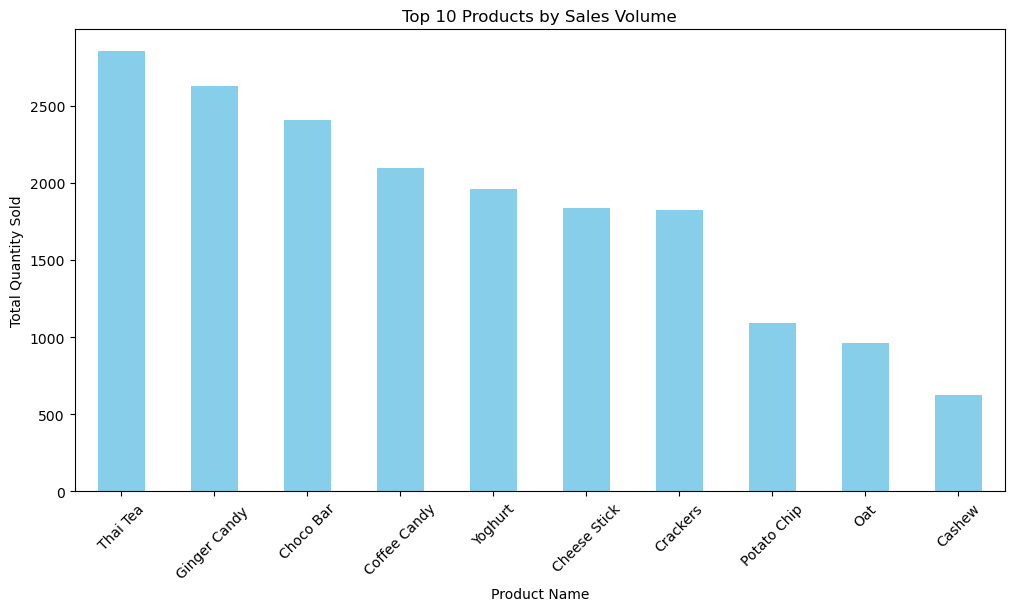

In [17]:
# Grouping by Product Name to calculate total quantity sold 
product_sales_volume = df.groupby('Product Name')['Qty'].sum().sort_values(ascending=False)
product_sales_revenue = df.groupby('Product Name')['TotalAmount'].sum().sort_values(ascending=False)

# Plotting the top 10 products by sales volume
plt.figure(figsize=(12, 6))
product_sales_volume.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


This visualization paints a clear picture on the products with the highest quantity sold,with 'Thai Tea' and 'Ginger candy' being the most purchased products.
 
Top 5 Products by Sales Volume:

1. Thai Tea
2. Ginger Candy
3. Choco Bar 
4. Coffee Candy 
5. Yoghurt

##### Total revenue generated

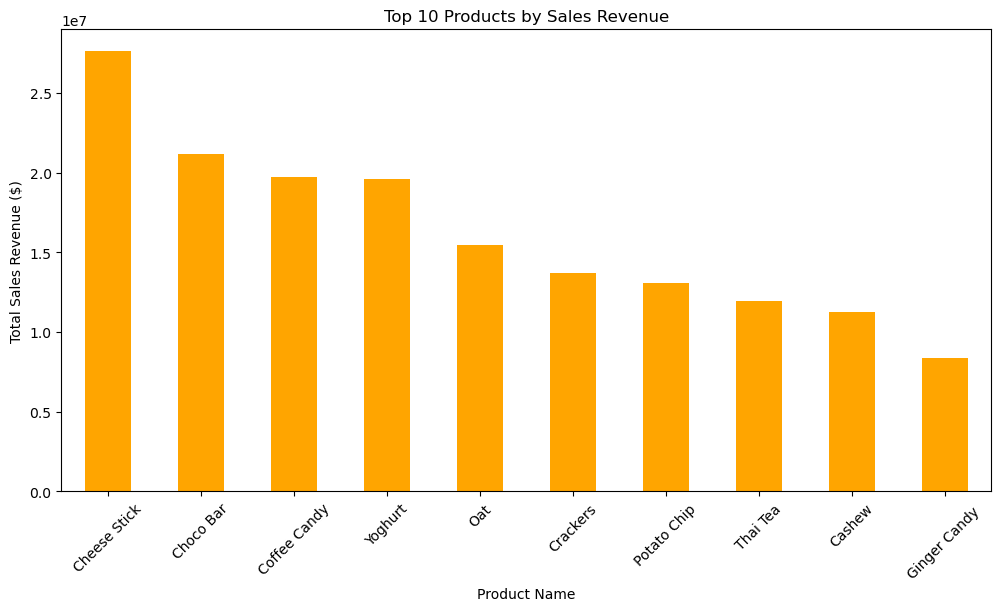

In [18]:
# Plotting the top 10 products by sales revenue
plt.figure(figsize=(12, 6))
product_sales_revenue.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Products by Sales Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Revenue ($)')
plt.xticks(rotation=45)
plt.show()

This  visualizations and data shows which products are most popular in terms of total sales revenue. 
'Cheese Stick' and 'Choco Bar' are particularly notable for their high revenue generation , with the highest revenue generators being :
1. Cheese Stick
2. Choco Bar
3. Coffee Candy
4. Yoghurt
5. Oat

### Sales Trends

Our analysis entailed determining and visualizing Sales Trends(i.e based on the monthly total sales amount) and analyze how sales have changed over time, looking at daily, weekly, and monthly trends. Metrics for analysis inluded :

1. Product Performance :

   To Examine which products are top-sellers and how their sales vary over time.


2. Store Performance : 

   To Explore how sales differ by store type and location.
   
Let's start with analyzing sales trends over time. 

We'll create visualizations to help understand these trends better.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
 8   StoreName      5020 non-null   object
 9   Product Name   5020 non-null   object
dtypes: int64(5), object(5)
memory usage: 392.3+ KB


In [20]:
# Removing the Date column as index
df = df.reset_index()
df.rename(columns={'index': 'date'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           5020 non-null   int64 
 1   TransactionID  5020 non-null   object
 2   CustomerID     5020 non-null   int64 
 3   Date           5020 non-null   object
 4   ProductID      5020 non-null   object
 5   Price          5020 non-null   int64 
 6   Qty            5020 non-null   int64 
 7   TotalAmount    5020 non-null   int64 
 8   StoreID        5020 non-null   int64 
 9   StoreName      5020 non-null   object
 10  Product Name   5020 non-null   object
dtypes: int64(6), object(5)
memory usage: 431.5+ KB


In [21]:
# Convert date data type and format
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5020 non-null   int64         
 1   TransactionID  5020 non-null   object        
 2   CustomerID     5020 non-null   int64         
 3   Date           5020 non-null   datetime64[ns]
 4   ProductID      5020 non-null   object        
 5   Price          5020 non-null   int64         
 6   Qty            5020 non-null   int64         
 7   TotalAmount    5020 non-null   int64         
 8   StoreID        5020 non-null   int64         
 9   StoreName      5020 non-null   object        
 10  Product Name   5020 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 431.5+ KB


In [22]:
#set date as index
df.set_index('Date', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2022-01-01 to 2022-12-31
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           5020 non-null   int64 
 1   TransactionID  5020 non-null   object
 2   CustomerID     5020 non-null   int64 
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
 8   StoreName      5020 non-null   object
 9   Product Name   5020 non-null   object
dtypes: int64(6), object(4)
memory usage: 431.4+ KB


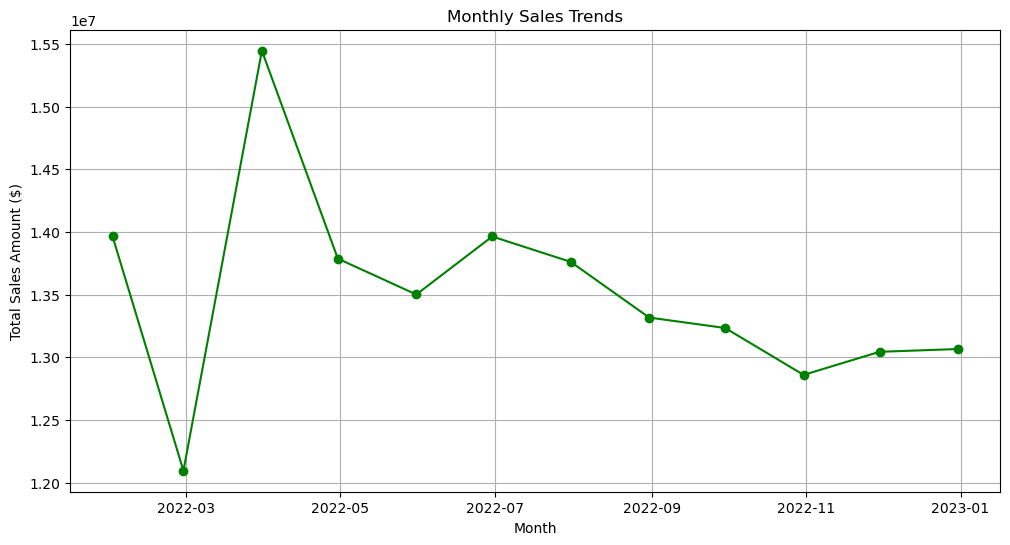

In [23]:
# Resampling the data on a monthly basis to analyze sales trends
monthly_sales = df.resample('M').sum()

# Plotting the monthly total sales amount
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['TotalAmount'], marker='o', linestyle='-', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount ($)')
plt.grid(True)
plt.show()

Based on the the monthly sales trends chart, here are some key insights we can infer:

Seasonal Variations:

There appears to be a peak in sales around the second month on the chart, which suggests a possible seasonal influence or a special event that caused a temporary increase in sales. This could be related to a holiday period, a major sales event, or a successful marketing campaign.

Sales Decline:

After the peak, there is a noticeable decline in the following month, which is quite sharp. This might indicate that the peak was indeed due to a one-time event or that there was an inventory or stock issue following the high-demand period.

Recovery and Fluctuations:

Following the sharp decline, sales seem to recover but do not reach the previous peak. There is some fluctuation with a general downward trend. This could imply that the market is facing some instability or that consumer demand is waning for the products offered.

Overall Trend:

The overall trend from the start to the end of the period seems to be slightly downward, despite the fluctuations. This might indicate a need for concern and could be a point of focus for the business to investigate further.


Implications for Business Strategy:

Depending on the cause of the peak and subsequent decline, the business might need to consider diversifying its products, adjusting pricing, improving supply chain resilience, or enhancing marketing efforts to smooth out such volatility.

### Sales Seasonality 

Our analysis identified sales seasonality behaviour over varied time ,any patterns or trends that repeat over a specific period (eg., monthly, quarterly, annually).
Started by :

1. Aggregating sales data monthly, quarterly, and annually.

2. Analyzing trends and patterns in these time frames.
3. Visualizing the results to identify any recurring patterns or significant insights.

 Plot showing the total transaction amount over the time period.

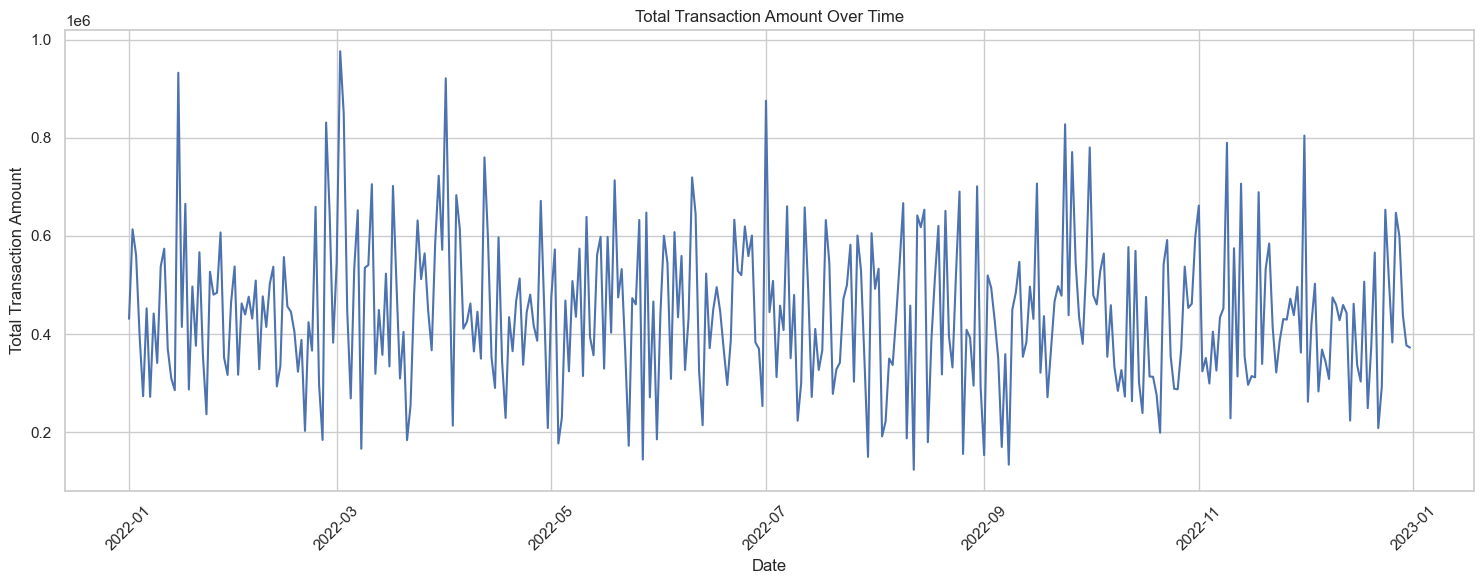

In [24]:
# Set the style for the plots
sns.set(style="whitegrid")

# Time series plot of TotalAmount over time
plt.figure(figsize=(15, 6))
plt.plot(df.groupby('Date')['TotalAmount'].sum())
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Some observations that could be useful for the marketing team :

Fluctuations in Transaction Amounts: The graph shows significant fluctuations in transaction amounts over time, with some peaks that suggest occasional high-value transactions.

Time Series Data: The data is time series, spanning a number of months, which indicates a good amount of historical data that can be analyzed for trends.

No Clear Seasonal Pattern: There doesn't appear to be a clear, repeating seasonal pattern. For marketing purposes, identifying periods of increased transactions could align with specific campaigns or market events.

Outliers: There are several spikes that stand out above the rest. These could be special events, sales, or promotions that resulted in higher transaction volumes.

In [25]:
# Removing the Date column as index
df = df.reset_index()
df.rename(columns={'index': 'date'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5020 non-null   datetime64[ns]
 1   date           5020 non-null   int64         
 2   TransactionID  5020 non-null   object        
 3   CustomerID     5020 non-null   int64         
 4   ProductID      5020 non-null   object        
 5   Price          5020 non-null   int64         
 6   Qty            5020 non-null   int64         
 7   TotalAmount    5020 non-null   int64         
 8   StoreID        5020 non-null   int64         
 9   StoreName      5020 non-null   object        
 10  Product Name   5020 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 431.5+ KB


A bar plot showing distribution of transactions over months.

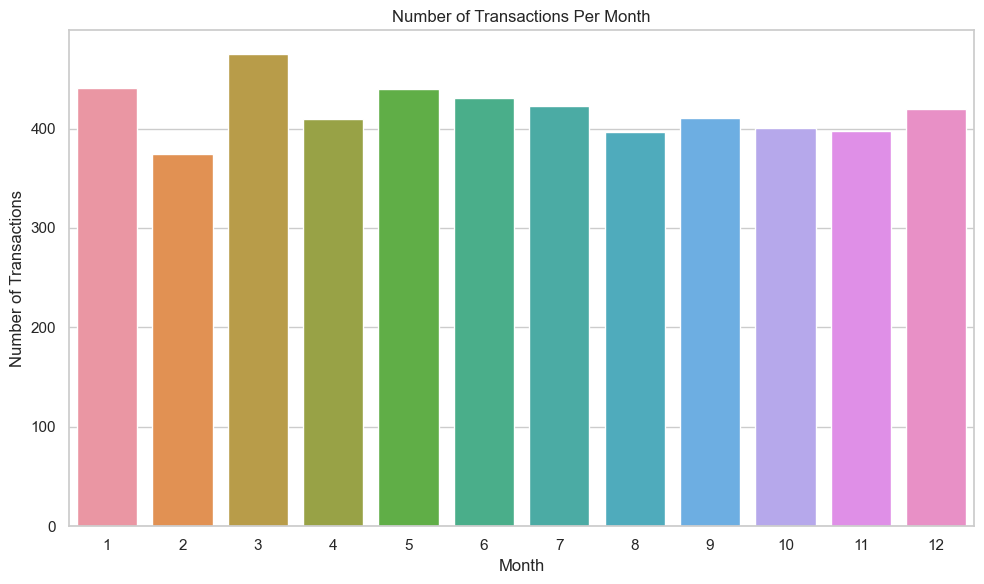

In [26]:
# Distribution of transactions over months
df['Month'] = df['Date'].dt.month
monthly_distribution = df.groupby('Month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_distribution.index, y=monthly_distribution.values)
plt.title('Number of Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

Some key insights and analysis that could be relevant for a marketing team:

Transaction Volume by Month: The chart suggests a variation in the number of transactions across different months. The highest number of transactions occurs in the 2nd month, and the lowest is seen in the 6th month.

Possible Seasonality: There may be seasonality in the transaction data, with certain months consistently seeing higher or lower transaction volumes. For example, months 1, 2, 11, and 12 show higher transaction volumes which could indicate seasonal peaks.

Planning Marketing Campaigns: Knowing which months have the highest and lowest number of transactions can help in planning marketing campaigns. Campaigns could be timed to boost transactions during typically low months or to capitalize on high-transaction months.

Consumer Behavior: The variations might reflect consumer behavior patterns, such as increased spending during specific seasons or holidays which correspond to certain months.

Resource Allocation: This data can help the marketing team allocate resources effectively, focusing their efforts on months that require a push or scaling back during months where the transaction volume is traditionally high.

Historical Data Comparison: It would be useful to compare this data with the same months in previous years to identify if the patterns are consistent or if there are any anomalies.

Promotional Impact: If there were any promotions or special deals offered in certain months, their impact on transaction volumes could be assessed. For instance, if the 2nd month had a major sale event, this could explain the peak in transactions.

Product/Service Review: The months with fewer transactions might be a good time to review the product or service offerings or customer service touchpoints to understand if improvements can be made.



A bar plot showing distribution of transactions over days of the week.

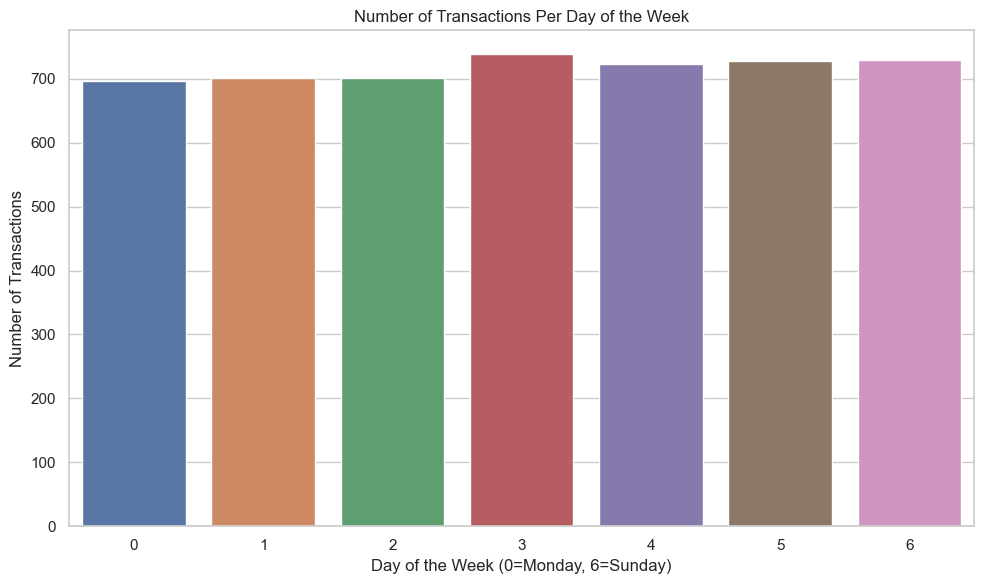

In [27]:
# Distribution of transactions over days of the week
df['DayOfWeek'] = df['Date'].dt.dayofweek
day_of_week_distribution = df.groupby('DayOfWeek').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_distribution.index, y=day_of_week_distribution.values)
plt.title('Number of Transactions Per Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


The bar chart illustrates the distribution of the number of transactions per day of the week. Here are several insights and an analysis that could be valuable for a marketing team:

Transaction Distribution: The transactions are fairly evenly distributed across the days of the week, with no single day showing a dramatically higher or lower number of transactions compared to the others.

Mid-Week Peak: There is a slight peak on the third day of the week (Wednesday), which may indicate mid-week is a slightly more popular time for transactions.

Weekend Analysis: The number of transactions does not drop significantly on the weekend (days 5 and 6), suggesting that consumer purchasing behavior remains consistent through the end of the week.

Marketing Strategies: Since there is no dramatic fluctuation, daily marketing efforts could be uniform throughout the week. However, slightly increased efforts on Wednesday could capitalize on the mid-week peak.

Operational Planning: The consistent number of transactions across the week suggests that staffing and operational support should be steady, without the need for significant scaling up or down on any particular day.

Promotional Timing: If promotions are run, they could be tested on different days of the week to see if they can shift the distribution curve and stimulate additional transactions on lower volume days.

Customer Engagement: The data may be indicative of consistent customer engagement throughout the week, which is positive for any retail or service business.

Further Segmentation: The marketing team might want to segment these transactions by time of day or customer demographics to refine their understanding of when and who is transacting.

Competitor Activity: It would be beneficial to understand competitor promotions and activities to see if there's a correlation between their marketing efforts and the transaction distribution.

External Factors: Consideration of external factors, such as holidays or local events, which might affect the number of transactions on specific days, could also provide more context.

In conclusion, while there are slight variances in transactions per day, the overall distribution is quite balanced. This suggests that the marketing team could implement a consistent daily strategy with the potential for small adjustments to optimize for the slight mid-week peak.

### Modelling

Our analysis aims to forecast future product sales, enabling us to create an effective inventory management system. To achieve this, we will employ univariate time series analysis, allowing us to generate predictions for each distinct product within our inventory.

Our first step  is use to use our data to generate the daily aggregate sales for each unique product


In [28]:
df.head()

,Date,date,TransactionID,CustomerID,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,Product Name,Month,DayOfWeek
0,2022-01-01,0,TR11369,328,P3,7500,4,30000,12,Prestasi Utama,Crackers,1,5
1,2022-01-01,1,TR16356,165,P9,10000,7,70000,1,Prima Tendean,Yoghurt,1,5
2,2022-01-01,2,TR1984,183,P1,8800,4,35200,4,Gita Ginara,Choco Bar,1,5
3,2022-01-01,3,TR35256,160,P1,8800,7,61600,4,Gita Ginara,Choco Bar,1,5
4,2022-01-01,4,TR41231,386,P9,10000,1,10000,4,Gita Ginara,Yoghurt,1,5


In [29]:
# Create a new column for the daily sales of each unique product
df['DailySales'] = df['Qty']

# Group by 'Date' and 'ProductID' and sum the daily sales
results = df.groupby(['Date', 'ProductID'])['DailySales'].sum().reset_index()

# Display the result
results.sample(10)

,Date,ProductID,DailySales
870,2022-04-27,P3,6
110,2022-01-15,P9,10
1135,2022-06-02,P9,5
1051,2022-05-21,P1,23
2071,2022-10-10,P8,3
1771,2022-08-31,P1,6
2350,2022-11-20,P4,1
880,2022-04-28,P5,24
453,2022-03-02,P6,7
2103,2022-10-15,P5,5


In [30]:
"""pivot the dataframe to so as to clearly see the aggregate daily sum of our unique products
 and use the product ideas as the features we are try to predict"""
 
sales_df = results.pivot_table(index='Date', columns='ProductID', values='DailySales', aggfunc='sum', fill_value=0).reset_index()
sales_df.head()

ProductID,Date,P1,P10,P2,P3,P4,P5,P6,P7,P8,P9
0,2022-01-01,11,1,6,4,4,3,0,4,2,14
1,2022-01-02,17,6,6,6,0,2,11,11,0,0
2,2022-01-03,0,7,14,11,2,9,6,8,4,2
3,2022-01-04,0,5,9,1,1,16,8,0,2,3
4,2022-01-05,4,0,0,0,1,7,0,2,3,13


In [31]:
# remove product id as the index column
sales_df = sales_df.rename_axis(None , axis = 1)

In [32]:
#set date as index
sales_df.set_index('Date', inplace=True)

In [33]:
"""We now have a dataframe containing daily product sales"""
sales_df.head()

,P1,P10,P2,P3,P4,P5,P6,P7,P8,P9
Date,,,,,,,,,,
2022-01-01,11,1,6,4,4,3,0,4,2,14
2022-01-02,17,6,6,6,0,2,11,11,0,0
2022-01-03,0,7,14,11,2,9,6,8,4,2
2022-01-04,0,5,9,1,1,16,8,0,2,3
2022-01-05,4,0,0,0,1,7,0,2,3,13


In [34]:
"""Check if our data is stationary or not"""

from statsmodels.tsa.stattools import adfuller
for column in sales_df.columns:
    result = adfuller(sales_df[column])
    print(f'ADF Statistic for {column}: {result[0]}, p-value: {result[1]}')

    if result[1] <= 0.05:
        print(f'{column} is stationary.')
    else:
        print(f'{column} is non-stationary.')

ADF Statistic for P1: -9.744625400915531, p-value: 8.319216026315214e-17
P1 is stationary.
ADF Statistic for P10: -20.455261400586732, p-value: 0.0
P10 is stationary.
ADF Statistic for P2: -19.216783705812418, p-value: 0.0
P2 is stationary.
ADF Statistic for P3: -19.733303044471533, p-value: 0.0
P3 is stationary.
ADF Statistic for P4: -18.791764337360856, p-value: 2.0234145960355415e-30
P4 is stationary.
ADF Statistic for P5: -20.43747797498883, p-value: 0.0
P5 is stationary.
ADF Statistic for P6: -6.620210923503044, p-value: 6.063713607304853e-09
P6 is stationary.
ADF Statistic for P7: -20.612009845787465, p-value: 0.0
P7 is stationary.
ADF Statistic for P8: -9.202956497523406, p-value: 1.9793299638409986e-15
P8 is stationary.
ADF Statistic for P9: -18.68642252271375, p-value: 2.04049917663546e-30
P9 is stationary.


Our data is stationary

In [35]:
# split data to train and test data
train_size = int(len(sales_df) * 0.8)
train = sales_df[:train_size]
test = sales_df[train_size:]

## Model Using VAR

Vector Autoregression, is a statistical model used for time series analysis which is particularly suitable for analyzing relationships among multiple time series variables. As we want to analyse and predict sales for different products , VAR is a suitable model for our analysis.

In [36]:
#fit the model
from statsmodels.tsa.api import VAR
model = VAR(train , freq = 'D')
result = model.fit()
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 10, Dec, 2023
Time:                     19:46:48
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    31.1350
Nobs:                     291.000    HQIC:                   30.3027
Log likelihood:          -8347.22    FPE:                8.29614e+12
AIC:                      29.7465    Det(Omega_mle):     5.72449e+12
--------------------------------------------------------------------
Results for equation P1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          6.146402         1.444181            4.256           0.000
L1.P1         -0.038761         0.060279           -0.643           0.520
L1.P10         0.082964         0.103148            0.804           0.421
L1.P2          0.

In [37]:
# Make predictions on testing data
test_forecast = result.forecast(test.values[-result.k_ar:], steps=len(test))
test_forecast_df = pd.DataFrame(test_forecast, columns=test.columns, index=test.index)

In [38]:
test_forecast_df

,P1,P10,P2,P3,P4,P5,P6,P7,P8,P9
Date,,,,,,,,,,
2022-10-20,6.942322,4.459067,7.368690,5.888545,3.131824,7.734594,1.354963,6.192598,2.296581,5.211412
2022-10-21,7.177602,4.937455,7.443659,4.953274,2.768943,7.950420,1.730853,5.715909,2.659672,5.414384
2022-10-22,7.073799,4.910142,7.475413,5.093119,2.845936,7.961059,1.710005,5.882656,2.672302,5.422259
2022-10-23,7.091261,4.909909,7.480768,5.073099,2.847175,7.954710,1.707910,5.856517,2.679438,5.425992
2022-10-24,7.090865,4.909260,7.478213,5.075542,2.848383,7.957076,1.708131,5.859397,2.680085,5.422236
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,7.090451,4.909354,7.478937,5.075355,2.848389,7.956884,1.708012,5.859185,2.680194,5.422333
2022-12-28,7.090451,4.909354,7.478937,5.075355,2.848389,7.956884,1.708012,5.859185,2.680194,5.422333
2022-12-29,7.090451,4.909354,7.478937,5.075355,2.848389,7.956884,1.708012,5.859185,2.680194,5.422333


From the results of our forecast we can see that our predictions become similar at some point. This could be as a result of the lack of diversity or variability in the training data making it difficult for the model to capture patterns that lead to diverse and distinct predictions. This is being caused by the fact that our data only has sales for only one time period (2022)

In [39]:
# test for accuracy of predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# true and predicted values
true_values = test
predicted_values = test_forecast_df
mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 3.379676894863034
MSE: 19.36973457299319
RMSE: 4.401106062456708


Our RMSE is 4.40 which is relativley low meaning our model prediction accuracy is reasonable. However due to the lack of diversity in the predictions, we will experiment with VAR models with other values to see if the predictions will improve.

In [40]:
#Fit VAR model with different values of p
for p in range(1, 4): # autoregressive order of 1 , 2 , 3
    model = VAR(train , freq = 'D')
    result = model.fit(p)
    print(f'Order {p}: AIC={result.aic}, BIC={result.bic}, HQIC={result.hqic}')

Order 1: AIC=29.746451331121232, BIC=31.13499277232008, HQIC=30.302707390364937
Order 2: AIC=30.043658081934243, BIC=32.701158060644275, HQIC=31.108384319306914
Order 3: AIC=30.369394389262645, BIC=34.30223962564622, HQIC=31.945264276139913


From our analysis observation , our model with an order of 1 performs better with the lowest AIC and BIC as compared to other models. An outregressive order of 1 means that  each variable in the model is regressed on its own past value (lag 1). We shall make use of that model to make our predictions.

In [41]:
"""Use that model to make predictions on our test data"""

# test the accuraccy prediction of our model on our test data
model2  = VAR(train , freq = 'D')
result2 = model2.fit(1)
# Make predictions on testing data
test_forecast2 = result2.forecast(test.values[-result.k_ar:], steps=len(test))
test_forecast_df2 = pd.DataFrame(test_forecast2, columns=test.columns, index=test.index)

In [42]:
test_forecast_df2 = test_forecast_df2
test_forecast_df2.head(10)


,P1,P10,P2,P3,P4,P5,P6,P7,P8,P9
Date,,,,,,,,,,
2022-10-20,6.942322,4.459067,7.368690,5.888545,3.131824,7.734594,1.354963,6.192598,2.296581,5.211412
2022-10-21,7.177602,4.937455,7.443659,4.953274,2.768943,7.950420,1.730853,5.715909,2.659672,5.414384
2022-10-22,7.073799,4.910142,7.475413,5.093119,2.845936,7.961059,1.710005,5.882656,2.672302,5.422259
2022-10-23,7.091261,4.909909,7.480768,5.073099,2.847175,7.954710,1.707910,5.856517,2.679438,5.425992
2022-10-24,7.090865,4.909260,7.478213,5.075542,2.848383,7.957076,1.708131,5.859397,2.680085,5.422236
2022-10-25,7.090341,4.909397,7.479011,5.075339,2.848363,7.956858,1.708038,5.859162,2.680143,5.422379
2022-10-26,7.090463,4.909349,7.478925,5.075354,2.848382,7.956888,1.708013,5.859186,2.680193,5.422347
2022-10-27,7.090449,4.909355,7.478937,5.075355,2.848389,7.956883,1.708013,5.859185,2.680193,5.422334
2022-10-28,7.090451,4.909354,7.478936,5.075354,2.848388,7.956885,1.708012,5.859185,2.680194,5.422333


In [43]:
true = test
pred = test_forecast_df2

mae2 = mean_absolute_error(true, pred)
mse2 = mean_squared_error(true, pred)
rmse2 = np.sqrt(mse)

print(f'MAE: {mae2}')
print(f'MSE: {mse2}')
print(f'RMSE: {rmse2}')

MAE: 3.379676894863034
MSE: 19.36973457299319
RMSE: 4.401106062456708


Our models rmse is similar to our first's model's rmse. At some point this model is also making similar predictions. Therefore we shall make  use of a long short-term memory model to see if the predictions will improve. 
Advantages:
1. Ability to identify deviations or anamolies 

2. Ability to handle sequences of different lengths irrespective of the duration of the time series. in this case, our dataset is very small with only one year sales.


## Model Using LSTM

In [44]:
sales_df = sales_df[['P1' , 'P2' , 'P3' , 'P4' , 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']]

In [45]:
# split data to training and test data
train_size = int(len(sales_df) * 0.8)
train = sales_df[:train_size]
test = sales_df[train_size:]

In [46]:
sales_df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
Date,,,,,,,,,,
2022-01-01,11,6,4,4,3,0,4,2,14,1
2022-01-02,17,6,6,0,2,11,11,0,0,6
2022-01-03,0,14,11,2,9,6,8,4,2,7
2022-01-04,0,9,1,1,16,8,0,2,3,5
2022-01-05,4,0,0,1,7,0,2,3,13,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,8,14,9,0,7,3,8,1,2,18
2022-12-28,15,12,10,1,3,2,10,4,6,5
2022-12-29,0,6,3,4,6,3,0,4,7,9


In [47]:
def split_series(series, n_past, n_future): # n_past is past observations , n_future is future observations
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [48]:
print(train.shape)
print(test.shape)

(292, 10)
(73, 10)


In [49]:
"""split data based on the number of specified past and future steps and reshape  the train and test to 3 dimensional arrays 
(no of samples , no of steps , no of features) because LSTM models in Keras expect input data to be in this three-dimensional format. """

import numpy as np
n_past =1
n_future = 1
n_features = 10

#
X_train, y_train= split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features)) # 
y_train= y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [50]:
import tensorflow as tf

# define input layer
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))

# defines LSTM layer with 100 units
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)

# applyies the LSTM layer to the input sequence
encoder_outputs1 = encoder_l1(encoder_inputs)

# extracts hidden states in the LTSM layer's output
encoder_states1 = encoder_outputs1[1:]

# repeats output sequence from the encoder to match the desired number of future time steps 
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

# defines LSTM layer in the decoder 
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)

# apply dense layer to each step
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#define model
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)
model_e1d1.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1, 10)]              0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 100),                44400     ['input_1[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 repeat_vector (RepeatVecto  (None, 1, 100)               0         ['lstm[0][0]']                
 r)                                                                                         

Build another model  with two LSTM layers in the encoder and two LSTM layers in the decoder.

In [51]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
model_e2d2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1, 10)]              0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 1, 100),             44400     ['input_2[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 lstm_3 (LSTM)               [(None, 100),                80400     ['lstm_2[0][0]']              
                              (None, 100),                                                  

In [52]:
#fit the two models on our test data 
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [53]:
# making predictions on our test data
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

3/3 [==============================] - 2s 8ms/step


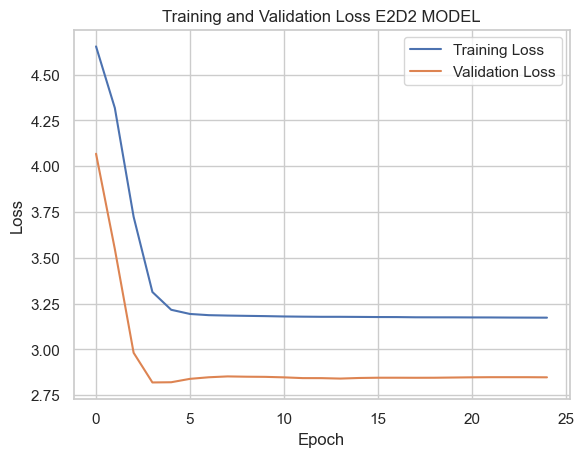

In [54]:
history = history_e2d2

import matplotlib.pyplot as plt

# training loss
plt.plot(history.history['loss'], label='Training Loss')
# validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# label
plt.title('Training and Validation Loss E2D2 MODEL')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

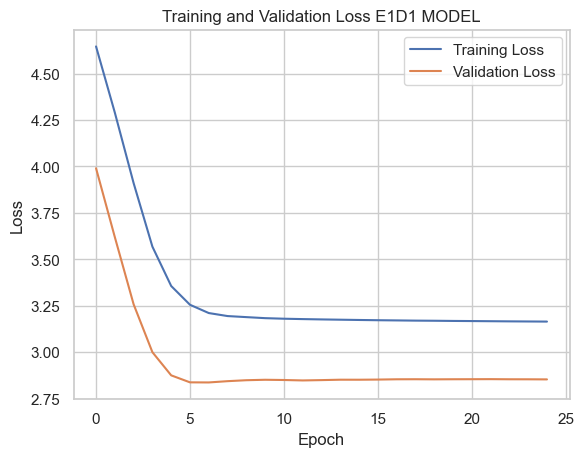

In [55]:
history = history_e1d1

import matplotlib.pyplot as plt

# training loss
plt.plot(history.history['loss'], label='Training Loss')
# validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# label
plt.title('Training and Validation Loss E1D1 MODEL')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Our E1D1 model has a slightly smoother curve compared to our E2D2 model. While a smoother validation loss curve is generally a sign that the model is performing better we need to make use of other technique to have a more comprehensive understanding of the models performance.

In [56]:

"""When working with LSTM models and time series data, the predictions are often multi-dimensional arrays, 
where each dimension represents different aspects of the prediction.
 To calculate performance metrics, it's common to flatten these arrays to make them one-dimensional
 so that you can easily compare the predicted values with the true values."""

from sklearn.metrics import mean_squared_error

pred_e1d1_flat = pred_e1d1.flatten()
pred_e2d2_flat = pred_e2d2.flatten()
y_test_flat = y_test.flatten()

mse_e1d1 = mean_squared_error(y_test_flat, pred_e1d1_flat)
mse_e2d2 = mean_squared_error(y_test_flat, pred_e2d2_flat)

rmse_e1d1 = np.sqrt(mse_e1d1)
rmse_e2d2 = np.sqrt(mse_e2d2)
print(f"RMSE for e1d1: {rmse_e1d1}")
print(f"RMSE for e2d2: {rmse_e2d2}")

RMSE for e1d1: 4.396756066825962
RMSE for e2d2: 4.3848773339399205


From our observation the RMSE of e1d1 is higher. This is a significant difference in our case because our first model had an rmse 
 4.40 meaning every slight improvment of model performance counts. There for we shall make use of e2d2 which has a lower RMSE

In [57]:
# reshape and convert to the format expected by the model
last_sales_data = sales_df.iloc[-1:, :].values.reshape((1, 1, -1))
num_days_in_year = 365

# initialize a list
forecast = []

# initial input data. our current input is going to be the last day on our sales df
current = last_sales_data
# make predictions for each day
for day in range(num_days_in_year):
    # predict current
    e2d2_predictions = model_e2d2.predict(current)

    # ensure predictions are correctly shaped
    e2d2_flattened_pred = e2d2_predictions.flatten()

    # append the predictions
    forecast.append(e2d2_flattened_pred)

    # update the input 
    current_input = np.concatenate([current[:, 1:, :], e2d2_predictions], axis=1)

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


In [58]:
"""Define the last day on our sales df this is because we will make use of this date to generate future dates for the year 2023"""

last_sales_date = sales_df.index[-1]

In [59]:
"""To be able to generate dates for 2023 , first ill have to convert this to datetime datatype"""
last_sales_date = pd.to_datetime(last_sales_date)

In [60]:
#generate 2023 dates
date_range_2023 = pd.date_range(last_sales_date + pd.DateOffset(1), periods=num_days_in_year)
date_range_2023

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [61]:
# convert forecast list to a NumPy array
forecast_array = np.array(forecast)

In [62]:
#assert
forecast_array

array([[5.57878  , 6.341684 , 4.366156 , ..., 2.352334 , 4.7789474,
        4.146437 ],
       [5.57878  , 6.341684 , 4.366156 , ..., 2.352334 , 4.7789474,
        4.146437 ],
       [5.57878  , 6.341684 , 4.366156 , ..., 2.352334 , 4.7789474,
        4.146437 ],
       ...,
       [5.57878  , 6.341684 , 4.366156 , ..., 2.352334 , 4.7789474,
        4.146437 ],
       [5.57878  , 6.341684 , 4.366156 , ..., 2.352334 , 4.7789474,
        4.146437 ],
       [5.57878  , 6.341684 , 4.366156 , ..., 2.352334 , 4.7789474,
        4.146437 ]], dtype=float32)

In [63]:
# check shapes before creating DataFrame to as having the right shapes is important for reshaping
print("Shape of forecast_array:", forecast_array.shape)
print("Length of date_range_2023:", len(date_range_2023))

Shape of forecast_array: (365, 10)
Length of date_range_2023: 365


In [64]:
forecast_array_reshaped = np.array(forecast).reshape((num_days_in_year, -1))

# create a DataFrame with predicted dates as the index
forecast_df = pd.DataFrame(data=forecast_array_reshaped, index=date_range_2023, columns=[f'P{feature + 1}_Forecast' for feature in range(10)])

# Display the DataFrame
forecast_df.tail()

,P1_Forecast,P2_Forecast,P3_Forecast,P4_Forecast,P5_Forecast,P6_Forecast,P7_Forecast,P8_Forecast,P9_Forecast,P10_Forecast
2023-12-27,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-12-28,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-12-29,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-12-30,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-12-31,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437


From our observation our ltsm model is still making predictions with similar values. We will experiment with a neural network model due to its ability to learn patterns and irregular fluctuations from data and contain noise especially in instances with little historical data as in our case



## RNN MODEL

In [65]:
# defines  input layer
input_layer = tf.keras.layers.Input(shape=(n_past, n_features))

#LSTM layer normalization
lstm_layer = tf.keras.layers.LSTM(100, return_sequences=True)(input_layer)
lstm_layer = tf.keras.layers.BatchNormalization()(lstm_layer)

# GRU layer normalization
gru_layer = tf.keras.layers.GRU(100, return_sequences=True)(lstm_layer)
gru_layer = tf.keras.layers.BatchNormalization()(gru_layer)

In [66]:
"""Additional layers to enable our  neural network to learn more complex and hierarchical representations from the input data"""

lstm_layer = tf.keras.layers.LSTM(100, return_sequences=True)(gru_layer)
lstm_layer = tf.keras.layers.BatchNormalization()(lstm_layer)

gru_layer = tf.keras.layers.GRU(100, return_sequences=True)(lstm_layer)
gru_layer = tf.keras.layers.BatchNormalization()(gru_layer)

In [67]:
# extract the last time step output from the GRU layer
last_gru_output = tf.keras.layers.Lambda(lambda x: x[:, -1, :])(gru_layer)

# repeatvector for sequence-to-sequence architecture
repeat_vector = tf.keras.layers.RepeatVector(n_future)(last_gru_output)

#additional LSTM and GRU layers
lstm_output = tf.keras.layers.LSTM(100, return_sequences=True)(repeat_vector)
gru_output = tf.keras.layers.GRU(100, return_sequences=True)(lstm_output)

#timedistributed dense layer for output
output_layer = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(gru_output)

#model
rnn_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

rnn_model.compile(optimizer='adam', loss='mse')

#model summary
rnn_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 10)]           0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 100)            44400     
                                                                 
 batch_normalization (Batch  (None, 1, 100)            400       
 Normalization)                                                  
                                                                 
 gru (GRU)                   (None, 1, 100)            60600     
                                                                 
 batch_normalization_1 (Bat  (None, 1, 100)            400       
 chNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 1, 100)            804

In [68]:
from keras.callbacks import EarlyStopping
# Example usage of EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_nn= rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# evaluate on train test

train_loss2 = rnn_model.evaluate(X_test , y_test , verbose =0 )

#evaluate on the test set
test_loss2 = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss2}')
print(f'Train loss :' , test_loss2)

Epoch 1/50
10/10 [==============================] - 31s 663ms/step - loss: 53.9395 - val_loss: 42.2954
Epoch 2/50
10/10 [==============================] - 0s 36ms/step - loss: 51.5266 - val_loss: 41.6210
Epoch 3/50
10/10 [==============================] - 0s 36ms/step - loss: 44.9804 - val_loss: 40.3290
Epoch 4/50
10/10 [==============================] - 0s 35ms/step - loss: 34.1547 - val_loss: 37.5942
Epoch 5/50
10/10 [==============================] - 0s 35ms/step - loss: 26.5515 - val_loss: 32.8686
Epoch 6/50
10/10 [==============================] - 0s 30ms/step - loss: 24.6144 - val_loss: 27.8719
Epoch 7/50
10/10 [==============================] - 0s 34ms/step - loss: 24.2761 - val_loss: 25.1193
Epoch 8/50
10/10 [==============================] - 0s 32ms/step - loss: 24.3444 - val_loss: 23.2585
Epoch 9/50
10/10 [==============================] - 0s 32ms/step - loss: 24.0977 - val_loss: 22.6974
Epoch 10/50
10/10 [==============================] - 0s 31ms/step - loss: 24.3095 - val_l

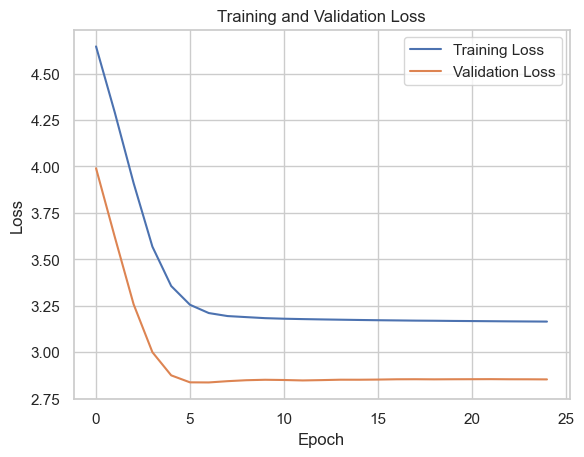

In [69]:
# plot 
import matplotlib.pyplot as plt
history_nn = history

# training loss
plt.plot(history.history['loss'], label='Training Loss')

#validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# label plot
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
pred = rnn_model.predict(X_test)

# Calculate the mean squared error
mse = np.mean(np.square(y_test - pred))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"rmse: {rmse}")

3/3 [==============================] - 4s 8ms/step
rmse: 4.374996441769347


In [71]:
import numpy as np

# reshape and convert to the format expected by the model
last_sales_data = sales_df.iloc[-1:, :].values.reshape((1, n_past, n_features))

# initialize a list
forecast2 = []

# initial input data. our current input is going to be the last day in our sales df
current2 = last_sales_data

# make predictions for each day in the next year
for day in range(365):
    # make a prediction for current input
    predictions2 = rnn_model.predict(current)

    # ensure predictions are shaped correctly
    flattened_pred2 = predictions2.flatten()

    # append predictions
    forecast2.append(flattened_pred2)

    # update the input
    current_input2 = np.concatenate([current[:, 1:, :], predictions2.reshape(1, 1, n_features)], axis=1)

# convert the forecast list to array
forecast_array2 = np.array(forecast2)

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 24ms/step


In [72]:
forecast_array.shape

(365, 10)

In [73]:
array_reshaped = np.array(forecast).reshape((num_days_in_year, -1))

# create a DataFrame 
forecast_df = pd.DataFrame(data=forecast_array_reshaped, index=date_range_2023, columns=[f'P{feature + 1}_Forecast' for feature in range(10)])

forecast_df.head()

,P1_Forecast,P2_Forecast,P3_Forecast,P4_Forecast,P5_Forecast,P6_Forecast,P7_Forecast,P8_Forecast,P9_Forecast,P10_Forecast
2023-01-01,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-01-02,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-01-03,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-01-04,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437
2023-01-05,5.57878,6.341684,4.366156,2.168787,7.14749,0.890409,4.956062,2.352334,4.778947,4.146437


In [74]:
# predictions
lstm_predictions = model_e2d2.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)

# combine predictions
ensemble_predictions = (lstm_predictions + rnn_predictions) / 2.0

# calculate mse
mse = np.mean((ensemble_predictions - y_test)**2)

# calculate rmse
rmse = np.sqrt(mse)

print(f"mse: {mse}")
print(f"rmse): {rmse}")

3/3 [==============================] - 0s 6ms/step
mse: 19.090396549593823
rmse): 4.3692558347610895


Our RNN model , is still returning similar values. To improve our forecast , we will combine our RNN and E2D2 models which are our best performing model through ensamble forecasting.
Importance of ensemble forecasting:
1. Combining predictions from multiple models helps mitigate the impact of individual model biases or errors.

2. More robust and generalized predictions since different models capture different aspects of the underlying patterns in the data.



## Ensemble Predictions


In [75]:
# reshape and convert to the format expected by models
last_sales_data = sales_df.iloc[-n_past:, :].values.reshape((1, n_past, n_features))

# initialize lists for forecasts
forecast_rnn = []
forecast_e2d2 = []

# initial input data. Our current input is going to be the last n_past days in our sales df
current_rnn = last_sales_data
current_e2d2 = last_sales_data

# make predictions for each day in the next year
for day in range(365):
    # make predictions for the current input
    predictions_rnn = rnn_model.predict(current_rnn)
    predictions_e2d2 = model_e2d2.predict(current_e2d2)

    # ensure predictions shaped properly
    flattened_pred_rnn = predictions_rnn.flatten()
    flattened_pred_e2d2 = predictions_e2d2.flatten()

    # append the predictions
    forecast_rnn.append(flattened_pred_rnn)
    forecast_e2d2.append(flattened_pred_e2d2)

    # update the input
    current_rnn = np.concatenate([current_rnn[:, 1:, :], predictions_rnn.reshape(1, 1, n_features)], axis=1)
    current_e2d2 = np.concatenate([current_e2d2[:, 1:, :], predictions_e2d2.reshape(1, 1, n_features)], axis=1)

# convert the forecast lists to numpy arrays
forecast_array_rnn = np.array(forecast_rnn)
forecast_array_e2d2 = np.array(forecast_e2d2)

# combine the forecasts
ensemble_forecast = (forecast_array_rnn + forecast_array_e2d2) / 2.0


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 16ms/step


In [76]:
reshaped_ensemble = np.array(ensemble_forecast).reshape((num_days_in_year, -1))

# create a DataFrame
ensemble_df = pd.DataFrame(data=reshaped_ensemble, index=date_range_2023, columns=[f'P{feature + 1}_Forecast' for feature in range(10)])

# display the DataFrame
ensemble_df.head()

,P1_Forecast,P2_Forecast,P3_Forecast,P4_Forecast,P5_Forecast,P6_Forecast,P7_Forecast,P8_Forecast,P9_Forecast,P10_Forecast
2023-01-01,6.135471,6.393889,4.539157,2.257453,7.296433,1.232123,5.328311,2.269948,5.026145,4.521671
2023-01-02,6.046018,6.379438,4.473815,2.265218,7.267634,1.213230,5.248885,2.316935,4.999625,4.515064
2023-01-03,6.096224,6.406622,4.507188,2.273569,7.302799,1.225229,5.281553,2.317157,5.031234,4.539874
2023-01-04,6.088640,6.402947,4.502057,2.272758,7.297517,1.223680,5.276175,2.317410,5.026665,4.536249
2023-01-05,6.090192,6.403736,4.503099,2.272961,7.298606,1.224018,5.277241,2.317386,5.027615,4.537002


In [77]:
# add column for date ranges
ensemble_df['Date'] = ensemble_df.index


In [78]:
ensemble_df = ensemble_df.set_index('Date')

### Challenges during modelling
Despite experimenting with various models and prediction methods , the biggest challenge has been the models still generating similar forecast values.Despite the ensemble model generating different results, we find that the results are very close in value.

One main reason for this would be not having enough historical data as the data we are working on only has sales for one year making it not enough for the models to determine patterns in the data. 

### Recommendations

Collect more data for our analysis.

### INVENTORY MANAGEMENT

Through averaging of both projects outcomes, were able to make one year sales predictions. We shall make use of this predictions to create an Inventory Manager class.

Upon instantiation, the class takes in the initial inventory level and the safety stock threshold, two parameters that  lay the foundation for effective inventory control.

The  sale  method, which is expected to work seamlessly with the forecasted data  simulates the reduction of inventory due to product sales,  taking as input the predicted daily sales for a week.   It also includes a crucial check for stockout conditions which lets us know  when the inventory level falls below the safety stock threshold


In [79]:
class InventoryManager:
    def __init__(self, initial_inventory, safety_stock):
        self.inventory = initial_inventory
        self.safety_stock = safety_stock

    def sale(self, predicted_weekly_sales):
        for predicted_daily_sales in predicted_weekly_sales:
            self.inventory -= predicted_daily_sales # to simulate reduction of inventory due to product sales

        # check for stockout
        if self.inventory < self.safety_stock:
            print("INVENTORY LEVEL IS BELOW SAFETY STOCK!!.")

    def print_inventory_status(self):
        print(f"Current Inventory Level: {self.inventory}")


In [83]:
## Test out with proxy inventory and initial stock values

"""We will make the assumption that the initial stock we have at the beginning of the week is 1000 units and our safety stock is 800 units"""

inventory_manager = InventoryManager(initial_inventory=1000, safety_stock=800)
weekly_forecasts = ensemble_df.resample('W').mean()

for week_number, weekly_sales in enumerate(weekly_forecasts.values, start=1):
    print(f"Week {week_number} Forecasts:")
    print(weekly_sales)

    inventory_manager.sale(weekly_sales)
    inventory_manager.print_inventory_status()
    print("=" * 30)

Week 1 Forecasts:
[6.1354713 6.3938894 4.5391574 2.2574534 7.2964334 1.2321228 5.328311
 2.2699475 5.026145  4.5216713]
Current Inventory Level: 954.9993973970413
Week 2 Forecasts:
[6.084412  6.40051   4.499277  2.271899  7.2945485 1.2225783 5.273578
 2.3172948 5.023931  4.5341177]
Current Inventory Level: 910.0772508382797
Week 3 Forecasts:
[6.0899506 6.4036145 4.502937  2.2729309 7.298438  1.2239664 5.277074
 2.3173912 5.027467  4.5368853]
Current Inventory Level: 865.126596570015
Week 4 Forecasts:
[6.0899506 6.4036145 4.502937  2.2729309 7.298438  1.2239664 5.277074
 2.3173912 5.027467  4.5368853]
Current Inventory Level: 820.1759423017502
Week 5 Forecasts:
[6.0899506 6.4036145 4.502937  2.2729309 7.298438  1.2239664 5.2770734
 2.317391  5.027467  4.536885 ]
INVENTORY LEVEL IS BELOW SAFETY STOCK!!.
Current Inventory Level: 775.2252892255783
Week 6 Forecasts:
[6.0899506 6.4036145 4.5029364 2.2729306 7.298438  1.2239664 5.2770734
 2.317391  5.027467  4.5368853]
INVENTORY LEVEL IS BELO

From analysis of the results, assuming there was no restock,  by week 5 the forecasted sales are already greater than the inventory level, causing the inventory to fall below the safety stock , therefore sending the low inventory warning. 

In [84]:
## Test out with proxy inventory and initial stock values

"""We will make the assumption that the initial stock we have at the beginning of the week is 800 units and our saefty stock is 700 units"""

inventory_manager = InventoryManager(initial_inventory=800, safety_stock=700)
weekly_forecasts = ensemble_df.resample('W').mean()

for week_number, weekly_sales in enumerate(weekly_forecasts.values, start=1):
    print(f"Week {week_number} Forecasts:")
    print(weekly_sales)

    inventory_manager.sale(weekly_sales)
    inventory_manager.print_inventory_status()
    print("=" * 30)

Week 1 Forecasts:
[6.1354713 6.3938894 4.5391574 2.2574534 7.2964334 1.2321228 5.328311
 2.2699475 5.026145  4.5216713]
Current Inventory Level: 754.9993973970413
Week 2 Forecasts:
[6.084412  6.40051   4.499277  2.271899  7.2945485 1.2225783 5.273578
 2.3172948 5.023931  4.5341177]
Current Inventory Level: 710.0772508382797
Week 3 Forecasts:
[6.0899506 6.4036145 4.502937  2.2729309 7.298438  1.2239664 5.277074
 2.3173912 5.027467  4.5368853]
INVENTORY LEVEL IS BELOW SAFETY STOCK!!.
Current Inventory Level: 665.126596570015
Week 4 Forecasts:
[6.0899506 6.4036145 4.502937  2.2729309 7.298438  1.2239664 5.277074
 2.3173912 5.027467  4.5368853]
INVENTORY LEVEL IS BELOW SAFETY STOCK!!.
Current Inventory Level: 620.1759423017502
Week 5 Forecasts:
[6.0899506 6.4036145 4.502937  2.2729309 7.298438  1.2239664 5.2770734
 2.317391  5.027467  4.536885 ]
INVENTORY LEVEL IS BELOW SAFETY STOCK!!.
Current Inventory Level: 575.2252892255783
Week 6 Forecasts:
[6.0899506 6.4036145 4.5029364 2.2729306 7.2

In Week 3 the inventory goes beyond the safety stock levels. The sales are greater than the available inventory, leading to a negative inventory level.